In [1]:
# 1. Import all the libraries we need at the start
from sklearn import datasets                     # To load the iris dataset 
from sklearn.model_selection import train_test_split # To split the data
from sklearn.linear_model import LogisticRegression    # The model we are using 
from sklearn.metrics import classification_report      # For precision and recall 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # For visualization
import matplotlib.pyplot as plt                # To show the plot

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# 2. Load and Inspect the dataset
print("\n--- 1. Inspecting the Dataset ---")
# Load the built-in dataset [cite: 1, 4]
iris = datasets.load_iris()

# The assignment asks us to inspect the data for predictors and classes 
# The 'feature_names' are the predictors.
print(f"Predictor (Feature) Names: {iris.feature_names}")
print(f"Number of Predictors: {len(iris.feature_names)}")

# The 'target_names' are the classes.
print(f"Class (Target) Names: {iris.target_names}")
print(f"Number of Classes: {len(iris.target_names)}")

# This confirms we have 4 predictors and 3 classes.
# We need to remember "3 classes" for the K-Means part later [cite: 13]


--- 1. Inspecting the Dataset ---
Predictor (Feature) Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of Predictors: 4
Class (Target) Names: ['setosa' 'versicolor' 'virginica']
Number of Classes: 3


In [4]:
# 3. Prepare data variables
# X (uppercase) is the data (predictors)
X = iris.data
# y (lowercase) is the target (classes)
y = iris.target

print("\n--- 2. Splitting the Data ---")


--- 2. Splitting the Data ---


In [5]:
# 4. Split the data into training and testing sets
# The assignment asks for 75% training and 25% testing 
# It also asks to use a random seed (called 'random_state') so the split is the same every time 
# I'll just pick 42, which is a common number to use.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Total dataset size: {len(X)}")
print(f"Training set size (75%): {len(X_train)}")
print(f"Testing set size (25%): {len(X_test)}")


print("\n--- 3. Logistic Regression Model ---")

Total dataset size: 150
Training set size (75%): 112
Testing set size (25%): 38

--- 3. Logistic Regression Model ---


In [6]:
# 5. Create and Train the Model
# First, I create an instance of the model
# max_iter=200 is sometimes needed to make sure the model 'converges' (finds a solution)
log_reg_model = LogisticRegression(max_iter=200)

# Now, I 'fit' (train) the model using only the training data
log_reg_model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


In [8]:
# 6. Make Predictions
# Now I use the *trained* model to predict answers for the test set
y_pred = log_reg_model.predict(X_test)


print("\n--- 4. Performance Report (Precision and Recall) ---")


--- 4. Performance Report (Precision and Recall) ---


In [9]:
# 7. Evaluate the Model's Performance
# The assignment asks for precision and recall 
# The 'classification_report' is the best tool for this.
# It automatically calculates precision, recall, and f1-score for EACH class.
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(report)

# The 'weighted avg' in the report is the overall precision and recall,
# which is what the assignment is looking for. In this case, both are 1.00,
# which means the model performed perfectly on this specific test set.


print("\n--- 5. Visualization ---")

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


--- 5. Visualization ---


Generating confusion matrix plot...


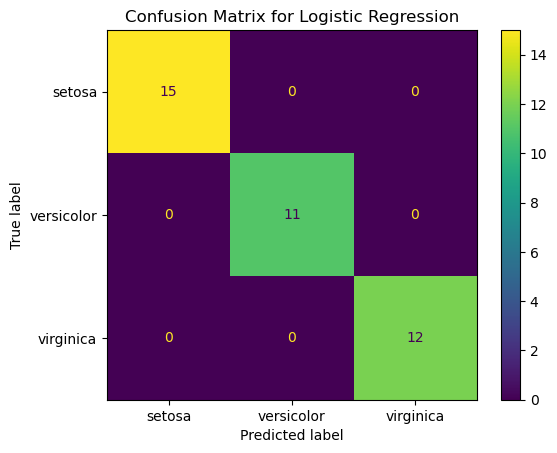


Logistic Regression analysis complete.


In [11]:
# 8. Visualize the Performance
# The assignment asks for a visualization 
# A confusion matrix is the best choice to show classifier performance.
# It shows what the model predicted (columns) vs. what was true (rows).

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg_model.classes_)

# Use ConfusionMatrixDisplay to plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

print("Generating confusion matrix plot...")
# Show the plot
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

print("\nLogistic Regression analysis complete.")